In [1]:
import numpy as np
from analytics.main import Equation, Distribution
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

import seaborn as sns

sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-white',)
sns.set_style("whitegrid", {'legend.frameon':True})

In [2]:
def build_ro_chart(ax, x, items, y_label, x_label):
    markerfacecolor='#DD8453'
    ax.plot(x, items, linewidth=linewidth, marker='X', markersize=8)
    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tickfontsize)
    #ax.set_xticks([0.2, 0.6, 1.0, 1.4, 1.8])

### Load coeff

/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_67158/958256467.py:55: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


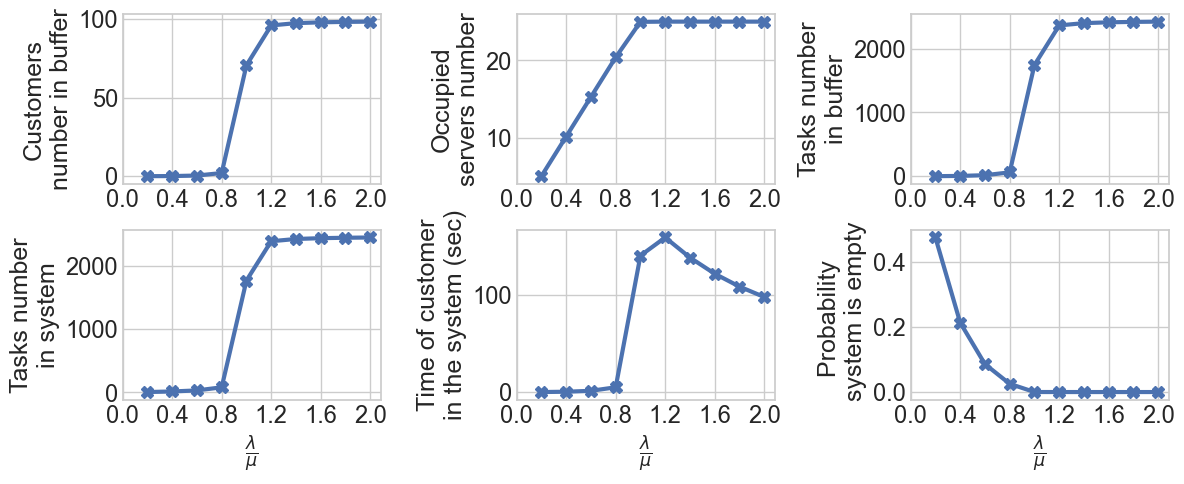

In [10]:
from functools import reduce

distrib_arr = [0.01 for i in range(0, 10)]

distrib = Distribution([0.02 for i in range(0, 50)])
_mu = 0.5
M = 25

ro_res = []

for lamb in range(1, 11):
    lamb = 0.1 * lamb
    
    eq = Equation(
        M,
        distrib,
        lamb,
        _mu,
        100
    )
    eq.build()
    eq.solve()

    metric = eq.calculate_metrics()
    ro_res.append(metric)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

fontsize=18
linewidth=3
markersize=10
tickfontsize=17

x = [.1 * i / _mu for i in range(1, 11)]


build_ro_chart(ax1, x, [item['avg_problems_in_buffer'] for item in ro_res], 'Customers\nnumber in buffer', '')
ax1.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2])

build_ro_chart(ax2, x, [item['busy_servers'] for item in ro_res], 'Occupied\nservers number', '')
ax2.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2])

build_ro_chart(ax3, x, [item['avg_tasks_in_buffer'] for item in ro_res], 'Tasks number\nin buffer', '')
ax3.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2])

build_ro_chart(ax4, x, [item['avg_tasks_in_system'] for item in ro_res], 'Tasks number\nin system', r'$\frac{\lambda}{\mu}$')
ax4.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2])

build_ro_chart(ax5, x, [item['avg_problem_time_in_buffer'] for item in ro_res], 'Time of customer\nin the system (sec)', r'$\frac{\lambda}{\mu}$')
ax5.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2])

build_ro_chart(ax6, x, [item['system_is_empty'] for item in ro_res], 'Probability \n system is empty', r'$\frac{\lambda}{\mu}$')
ax6.set_xticks([0, 0.4, 0.8, 1.2, 1.6, 2])

fig.tight_layout()

# fig.legend(*ax6.get_legend_handles_labels(), loc='lower center', 
#            bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=20, frameon=True)

fig.savefig('multirunner_analytics_ro_chart.png',  bbox_inches="tight")


### servers number

/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_67158/1567631173.py:52: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


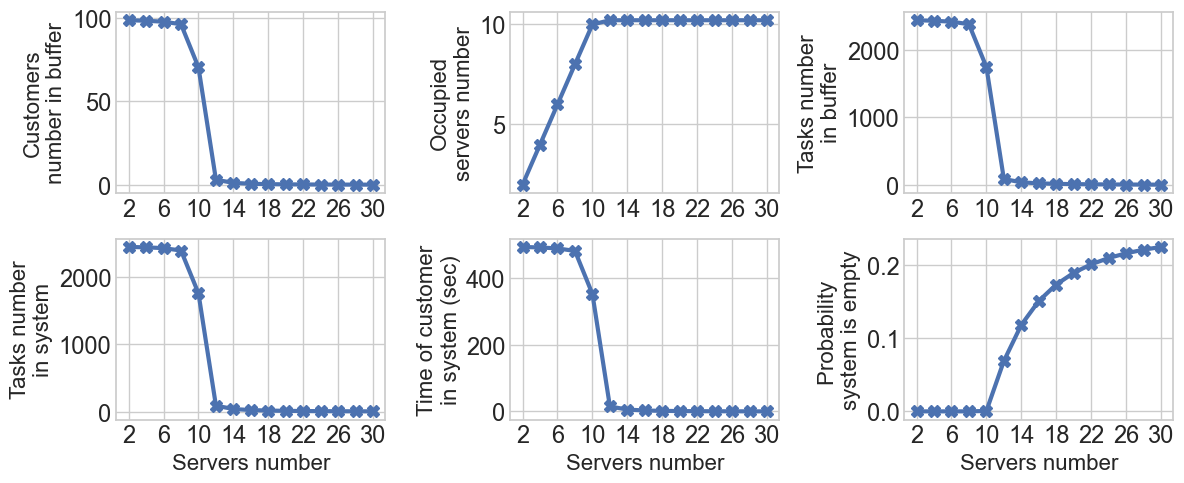

In [11]:
from functools import reduce

distrib = Distribution([0.02 for i in range(0, 50)])
_mu = 0.5
lamb = 0.2

servers_res = []

for m in range(2, 32, 2):
    eq = Equation(
        m,
        distrib,
        lamb,
        _mu,
        100
    )
    eq.build()
    eq.solve()

    metric = eq.calculate_metrics()
    servers_res.append(metric)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

fontsize=16
linewidth=3
markersize=10
tickfontsize=17

x = [i for i in range(2, 32, 2)]


build_ro_chart(ax1, x, [item['avg_problems_in_buffer'] for item in servers_res], 'Customers\nnumber in buffer', '')
ax1.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])

build_ro_chart(ax2, x, [item['busy_servers'] for item in servers_res], 'Occupied\nservers number', '')
ax2.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])

build_ro_chart(ax3, x, [item['avg_tasks_in_buffer'] for item in servers_res], 'Tasks number\nin buffer', '')
ax3.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])

build_ro_chart(ax4, x, [item['avg_tasks_in_system'] for item in servers_res], 'Tasks number\nin system', 'Servers number')
ax4.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])


build_ro_chart(ax5, x, [item['avg_problem_time_in_buffer'] for item in servers_res], 'Time of customer\nin system (sec)', 'Servers number')
ax5.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])

build_ro_chart(ax6, x, [item['system_is_empty'] for item in servers_res], 'Probability \nsystem is empty', 'Servers number')
ax6.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])

fig.tight_layout()

# fig.legend(*ax6.get_legend_handles_labels(), loc='lower center', 
#            bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=20, frameon=True)

fig.savefig('multirunner_analytics_servers_chart.png',  bbox_inches="tight")

### avg tasks in customer

/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_67158/1356204178.py:53: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


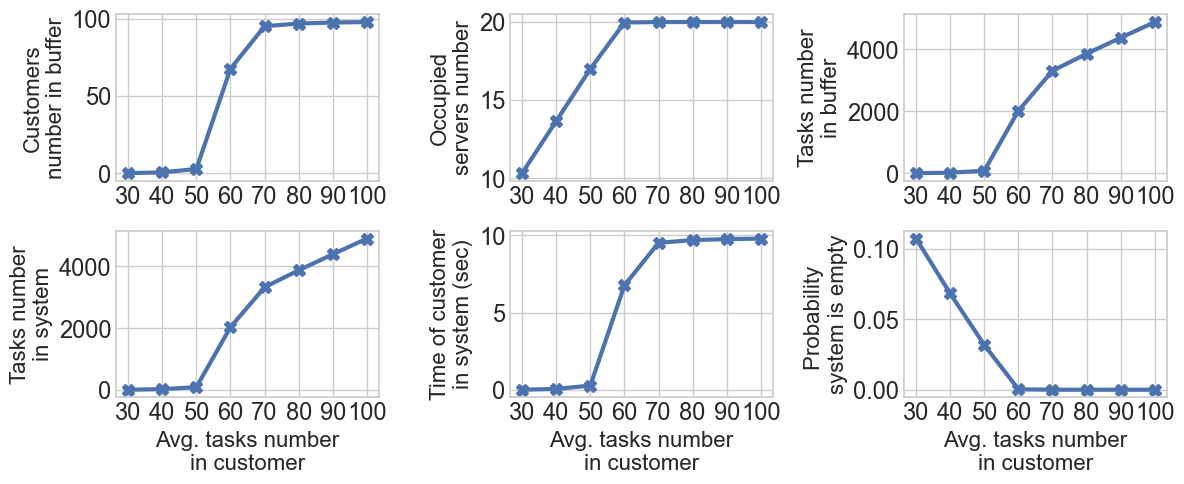

In [12]:
from functools import reduce

_mu = 15
lamb = 10
M = 20

servers_res = []

for d in range(30, 105, 10):
    distrib = Distribution([1 / d for i in range(0, d)])
    
    eq = Equation(
        M,
        distrib,
        lamb,
        _mu,
        100
    )
    eq.build()
    eq.solve()

    metric = eq.calculate_metrics()
    servers_res.append(metric)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

fontsize=16
linewidth=3
markersize=10
tickfontsize=17

x = [i for i in range(30, 105, 10)]


build_ro_chart(ax1, x, [item['avg_problems_in_buffer'] for item in servers_res], 'Customers\nnumber in buffer', '')
ax1.set_xticks([i for i in range(30, 105, 10)])

build_ro_chart(ax2, x, [item['busy_servers'] for item in servers_res], 'Occupied\nservers number', '')
ax2.set_xticks([i for i in range(30, 105, 10)])

build_ro_chart(ax3, x, [item['avg_tasks_in_buffer'] for item in servers_res], 'Tasks number\nin buffer', '')
ax3.set_xticks([i for i in range(30, 105, 10)])

build_ro_chart(ax4, x, [item['avg_tasks_in_system'] for item in servers_res], 'Tasks number\nin system', 'Avg. tasks number\nin customer')
ax4.set_xticks([i for i in range(30, 105, 10)])

build_ro_chart(ax5, x, [item['avg_problem_time_in_buffer'] for item in servers_res], 'Time of customer\nin system (sec)', 'Avg. tasks number\nin customer')
ax5.set_xticks([i for i in range(30, 105, 10)])

build_ro_chart(ax6, x, [item['system_is_empty'] for item in servers_res], 'Probability \nsystem is empty', 'Avg. tasks number\nin customer')
ax6.set_xticks([i for i in range(30, 105, 10)])

fig.tight_layout()

# fig.legend(*ax6.get_legend_handles_labels(), loc='lower center', 
#            bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=20, frameon=True)

fig.savefig('multirunner_analytics_tasks_in_customer_chart.png',  bbox_inches="tight")

# Comparison analytics with multirunner

In [13]:
# multirunner

lambda_100 = {
    'avg_problems_in_buffer': 0.08333333333333333, 
    'busy_servers': 5.080851619644723, 
    'avg_tasks_in_buffer': 12.68560606060606, 
    'avg_tasks_in_system': 17.760449320794148, 
    'system_is_empty': 0.46812957157784746
}

# TODO
lambda_90 = {
    'avg_problems_in_buffer': 0.08333333333333333, 
    'busy_servers': 5.080851619644723, 
    'avg_tasks_in_buffer': 12.68560606060606, 
    'avg_tasks_in_system': 17.760449320794148, 
    'system_is_empty': 0.46812957157784746
}

lambda_80 = {
    'avg_problems_in_buffer': 0.6331333333333333, 
    'busy_servers': 8.1662446667, 
    'avg_tasks_in_buffer': 23.5192, 
    'avg_tasks_in_system': 31.7, 
    'system_is_empty': 0.42226
}

# TODO
lambda_70 = {
    'avg_problems_in_buffer': 0.3331333333333333, 
    'busy_servers': 9.178666666666667, 
    'avg_tasks_in_buffer': 74.5192, 
    'avg_tasks_in_system': 38.7, 
    'system_is_empty': 0.2826
}

lambda_60 = {
    'avg_problems_in_buffer': 0.32610677742883193, 
    'busy_servers': 10.517222165940634,
    'avg_tasks_in_buffer': 30.2250531861007,
    'avg_tasks_in_system': 38.74217404518286, 
    'system_is_empty': 0.20954817141120456
}

lambda_50 = {
    'avg_problems_in_buffer': 0.32610677742883193, 
    'busy_servers': 12.517222165940634,
    'avg_tasks_in_buffer': 30.2250531861007,
    'avg_tasks_in_system': 38.74217404518286, 
    'system_is_empty': 0.159811120456
}

# TODO
lambda_40 = {
    'avg_problems_in_buffer': 10.32610677742883193, 
    'busy_servers': 14.517222165940634,
    'avg_tasks_in_buffer': 64.2250531861007,
    'avg_tasks_in_system': 78.74217404518286, 
    'system_is_empty': 0.02954817141120456
}

# TODO
lambda_30 = {
    'avg_problems_in_buffer': 98.2318571, 
    'busy_servers': 14.98231525,
    'avg_tasks_in_buffer': 4298.23751923,
    'avg_tasks_in_system': 4313.1235610, 
    'system_is_empty': 0.00025235611204
}

# TODO
lambda_20 = {
    'avg_problems_in_buffer': 98.2318571, 
    'busy_servers': 14.98231525,
    'avg_tasks_in_buffer': 4298.23751923,
    'avg_tasks_in_system': 4313.1235610, 
    'system_is_empty': 0.00025235611204
}

In [14]:
distrib = Distribution([0.01 for i in range(100)])

eq = Equation(
        15,
        distrib,
        1 / 30,
        1 / 10,
        100
    )
eq.build()
eq.solve()

metric = eq.calculate_metrics()
print(metric)

{'avg_problems_in_buffer': 93.33663815703754, 'busy_servers': 14.999999937755026, 'avg_tasks_in_buffer': 4654.1635885704445, 'avg_tasks_in_system': 4669.1635885082, 'avg_problem_time_in_buffer': 2800.0991447111264, 'system_is_empty': 2.0000775941673634e-09}


In [15]:
# analyics

a_lambda_100 = {
    'avg_problems_in_buffer': 0.08564162545006812, 
    'busy_servers': 5.05000000000004, 
    'avg_tasks_in_buffer': 12.76060219198373, 
    'avg_tasks_in_system': 17.81060219198377, 
    'avg_problem_time_in_buffer': 8.564162545006813,
    'system_is_empty': 0.529907343911756
}

a_lambda_90 = {
    'avg_problems_in_buffer': 0.11419254639717297, 
    'busy_servers': 5.611111111111207, 
    'avg_tasks_in_buffer': 15.301801217042517, 
    'avg_tasks_in_system': 20.912912328153723, 
    'avg_problem_time_in_buffer': 10.277329175745567, 
    'system_is_empty': 0.48785280514407126
}

a_lambda_80 = {
    'avg_problems_in_buffer': 0.15986420762314615, 
    'busy_servers': 6.312499999998252, 
    'avg_tasks_in_buffer': 19.02384070789923, 
    'avg_tasks_in_system': 25.33634070789748, 
    'avg_problem_time_in_buffer': 12.789136609851692, 
    'system_is_empty': 0.4377524385041445
}

a_lambda_70 = {
    'avg_problems_in_buffer': 0.23988052392461814, 
    'busy_servers': 7.214285714283834, 
    'avg_tasks_in_buffer': 24.947574488824284, 
    'avg_tasks_in_system': 32.16186020310812, 
    'avg_problem_time_in_buffer': 16.79163667472327, 
    'system_is_empty': 0.3771720976543152
}

a_lambda_60 = {
    'avg_problems_in_buffer': 0.40097343823834775,
    'busy_servers': 8.416666666664025,
    'avg_tasks_in_buffer': 35.68663600408385, 
    'avg_tasks_in_system': 44.10330267074788,
    'avg_problem_time_in_buffer': 24.058406294300866, 
    'system_is_empty': 0.30269161797025257
}

a_lambda_50 = {
    'avg_problems_in_buffer': 0.8160946234384749, 
    'busy_servers': 10.09999999999994, 
    'avg_tasks_in_buffer': 60.39100213461886, 
    'avg_tasks_in_system': 70.4910021346188, 
    'avg_problem_time_in_buffer': 40.80473117192375, 
    'system_is_empty': 0.20950083455327564
}

a_lambda_40 = {
    'avg_problems_in_buffer': 2.826862007355838, 
    'busy_servers': 12.624999999980007, 
    'avg_tasks_in_buffer': 166.78485844125802, 
    'avg_tasks_in_system': 179.40985844123804, 
    'avg_problem_time_in_buffer': 113.07448029423351, 
    'system_is_empty': 0.09114377492132564
}

a_lambda_30 = {
    'avg_problems_in_buffer': 93.33663815703754, 
    'busy_servers': 14.999999937755026, 
    'avg_tasks_in_buffer': 4654.1635885704445,
    'avg_tasks_in_system': 4669.1635885082, 
    'avg_problem_time_in_buffer': 2800.0991447111264, 
    'system_is_empty': 2.0000775941673634e-09
}


a_lambda_20 = {
    'avg_problems_in_buffer': 97.88958009098306, 
    'busy_servers': 14.99999999999999, 
    'avg_tasks_in_buffer': 4879.534214503658, 
    'avg_tasks_in_system': 4894.534214503658, 
    'avg_problem_time_in_buffer': 1957.791601819661, 
    'system_is_empty': 3.8153085455816705e-16
}


[0.09999999999999999, 0.1111111111111111, 0.125, 0.14285714285714285, 0.16666666666666666, 0.19999999999999998, 0.25, 0.3333333333333333, 0.5]


/var/folders/51/xsy_132d0qn6cs7kbh37ynf40000gn/T/ipykernel_67158/3026450681.py:83: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


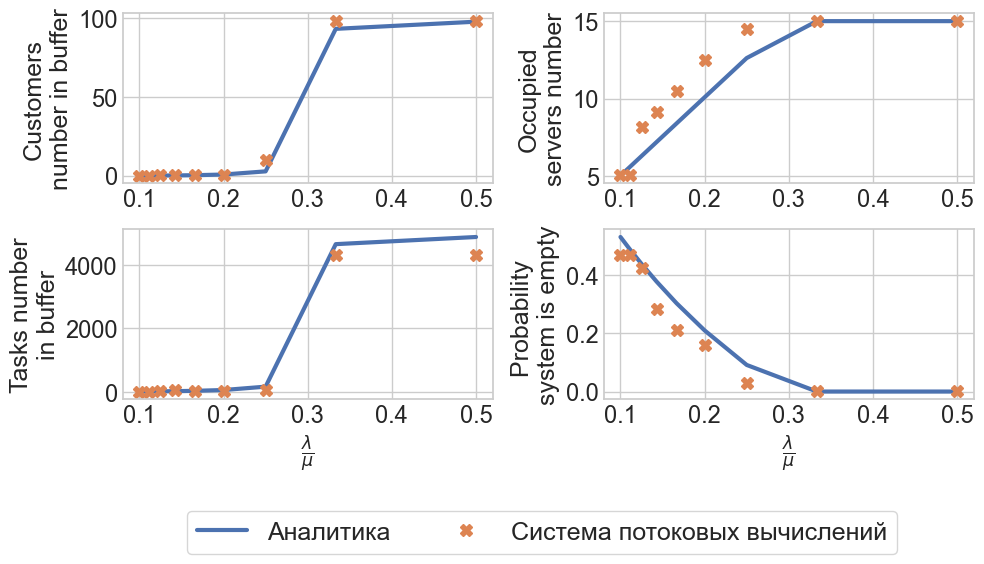

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5), constrained_layout=True)

fontsize=18
linewidth=3
markersize=8
tickfontsize=17

def build_comparison_chart(ax, x, analytic_items, items, y_label, x_label):
    markerfacecolor='#DD8453'
    
    ax.plot(x, analytic_items, linewidth=linewidth, marker=None, markersize=markersize, label='Аналитика')
    ax.plot(x, items, linewidth=0, marker='X', markersize=markersize, label='Система потоковых вычислений')
    
    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tickfontsize)



x = [(1 / i) / 0.1 for i in range(100, 10, -10)]

print(x)

analytics = [
    a_lambda_100,
    a_lambda_90, 
    a_lambda_80, 
    a_lambda_70, 
    a_lambda_60, 
    a_lambda_50, 
    a_lambda_40, 
    a_lambda_30, 
    a_lambda_20
]
multirunner = [
    lambda_100,
    lambda_90,
    lambda_80,
    lambda_70,
    lambda_60,
    lambda_50,
    lambda_40,
    lambda_30,
    lambda_20
]

build_comparison_chart(
    ax1, 
    x, 
    [item['avg_problems_in_buffer'] for item in analytics], 
    [item['avg_problems_in_buffer'] for item in multirunner], 
    'Customers\nnumber in buffer', 
    ''
)

build_comparison_chart(
    ax2, 
    x, 
    [item['busy_servers'] for item in analytics], 
    [item['busy_servers'] for item in multirunner], 
    'Occupied\nservers number', 
    ''
)

build_comparison_chart(
    ax3, 
    x, 
    [item['avg_tasks_in_buffer'] for item in analytics], 
    [item['avg_tasks_in_buffer'] for item in multirunner], 
    'Tasks number\nin buffer', 
    r'$\frac{\lambda}{\mu}$'
)

build_comparison_chart(
    ax4, 
    x, 
    [item['system_is_empty'] for item in analytics], 
    [item['system_is_empty'] for item in multirunner], 
    'Probability \nsystem is empty', 
    r'$\frac{\lambda}{\mu}$'
)

fig.tight_layout()

fig.legend(*ax4.get_legend_handles_labels(), loc='lower center', 
           bbox_to_anchor=(0.55, -0.15), ncol=3, fontsize=18, frameon=True)

fig.savefig('multirunner-comparison_chart.png',  bbox_inches="tight")


